<a href="https://colab.research.google.com/github/PaulinaRuizB/Machine_Learning_Theory/blob/main/Task_3_Analytic_and_iterative_solution_for_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal: Solución analítica e iterativa

## Modelo
En regresión lineal buscamos un vector de parámetros $\mathbf{w}$ tal que:

$$
\hat{y} = X \mathbf{w}
$$

donde:
- $X \in \mathbb{R}^{N \times D}$ es la matriz de datos (con $N$ muestras y $D$ características, incluyendo el bias si lo agregamos),
- $\mathbf{w} \in \mathbb{R}^D$ son los parámetros o pesos,
- $\hat{y}$ son las predicciones.

---

## Función de costo (Error cuadrático medio)

El error cuadrático medio (MSE) se define como:

$$
J(\mathbf{w}) \;=\; \frac{1}{N} \, \lVert X \mathbf{w} - \mathbf{y} \rVert^2
\;=\; \frac{1}{N} \sum_{i=1}^N \left( \hat{y}_i - y_i \right)^2
$$

---

## Solución analítica (mínimos cuadrados)

Derivando $J(\mathbf{w})$ respecto a $\mathbf{w}$ e igualando a cero se obtiene:

$$
\mathbf{w}^* = (X^\top X)^{-1} X^\top \mathbf{y}
$$

Con regularización tipo **ridge** (para estabilizar la inversión), la fórmula se convierte en:

$$
\mathbf{w}^* = (X^\top X + \lambda I)^{-1} X^\top \mathbf{y}
$$

donde $\lambda > 0$ controla la penalización sobre los parámetros.

---

## Solución iterativa (Gradiente Descendente)

El gradiente de la función de costo es:

$$
\nabla_{\mathbf{w}} J(\mathbf{w}) \;=\; \frac{2}{N} X^\top (X \mathbf{w} - \mathbf{y})
$$

La regla de actualización en el gradiente descendente es:

$$
\mathbf{w}_{t+1} \;=\; \mathbf{w}_t \;-\; \eta \, \nabla_{\mathbf{w}} J(\mathbf{w}_t)
$$

donde $\eta$ es la **tasa de aprendizaje**.

---

## Convergencia

Durante el entrenamiento podemos monitorear:

- **Evolución del costo:**
  $$
  J(\mathbf{w}_t) \quad \text{vs.} \quad t
  $$

- **Magnitud de los cambios en los parámetros:**
  $$
  \Delta \mathbf{w}_t = \lVert \mathbf{w}_{t+1} - \mathbf{w}_t \rVert
  $$

Incluso podemos graficar la relación:

$$
J(\mathbf{w}_t) \quad \text{vs.} \quad \Delta \mathbf{w}_t
$$

para visualizar cómo el error disminuye al mismo tiempo que los parámetros se estabilizan.


## Librerías

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

## Base de datos simulada

(1000, 20)
(1000,)


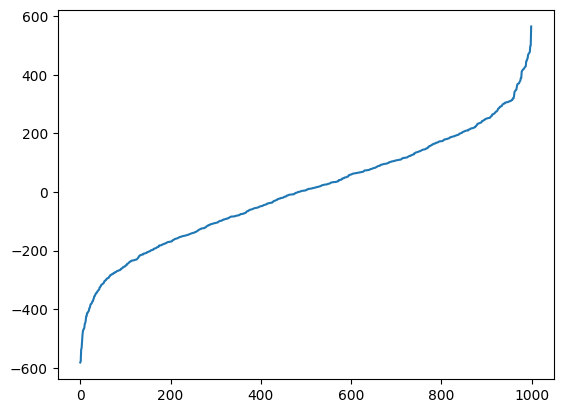

In [2]:
N = 1000 #Samples
P = 20 # features
x, y = make_regression(n_samples=N, n_features=P, noise=0.1, random_state=42)
print(x.shape)
print(y.shape)

plt.plot(np.sort(y))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

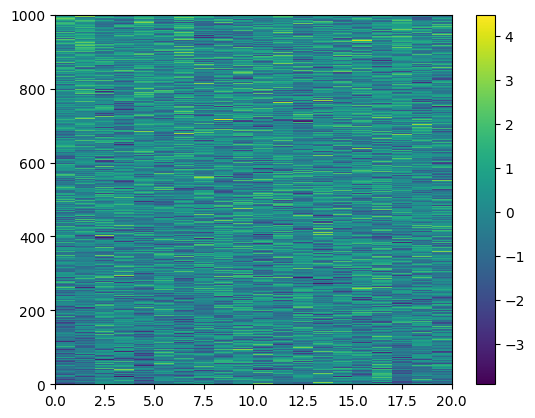

In [3]:
ind_ = np.argsort(y)
plt.pcolormesh(x[ind_]) #para mostrar la gráfica como matriz con colores
plt.colorbar()
plt.show

[ 8.00015870e+01  9.85791489e+01  5.56725661e+00  2.42188895e-03
  8.64660571e+01 -3.94762241e-03  6.94305381e+01 -3.55913015e-04
  2.38018824e-03 -3.12018555e-03  1.86066282e+01  3.96353668e+01
  4.92664004e-04  3.10348876e+00 -4.42266205e-03  2.63864234e+01
 -2.42866192e-03  8.68824516e+01  3.51389388e-03  1.62268274e-03]


<StemContainer object of 3 artists>

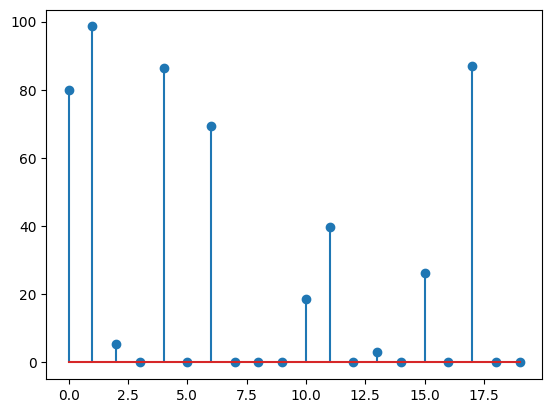

In [4]:
def mincua_reg(x,y, lamb_ = 1e-3): #optimizar y ajustarse
  alpha = np.linalg.inv(x.T.dot(x)+lamb_*np.eye(x.shape[1])).dot(x.T).dot(y) #fórmula alpha
  return alpha

alpha = mincua_reg(x,y)
print(alpha)
plt.stem(np.abs(alpha))

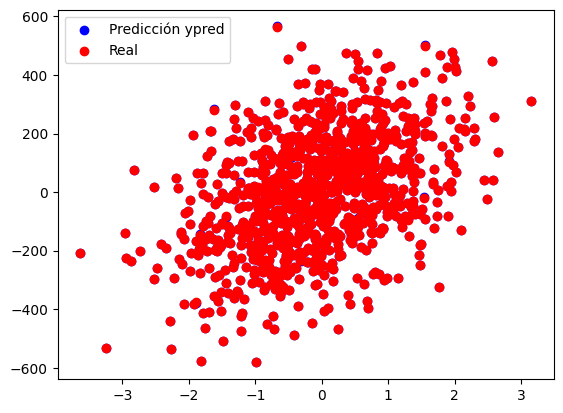

In [5]:
ypred = x.dot(alpha)
plt.scatter(x[ind_,0], ypred[ind_], c='b', marker ='o', label='Predicción ypred') #scatter = dispersión
plt.scatter(x[ind_,0], y[ind_], c='r', label='Real')
plt.legend()
plt.show()

## Base de datos real

In [6]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8)
(20640,)


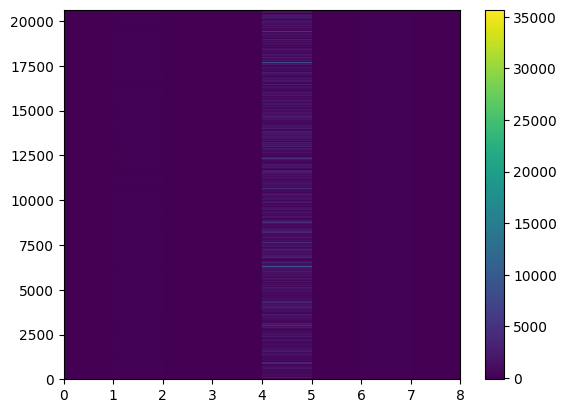

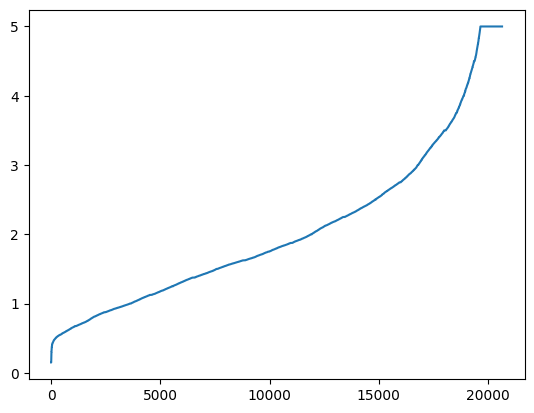

In [7]:
Xhouse = housing.data
Yhouse = housing.target
print(Xhouse.shape)
print(Yhouse.shape)

plt.pcolormesh(Xhouse)
plt.colorbar()
plt.show()
plt.plot(np.sort(Yhouse))
plt.show()

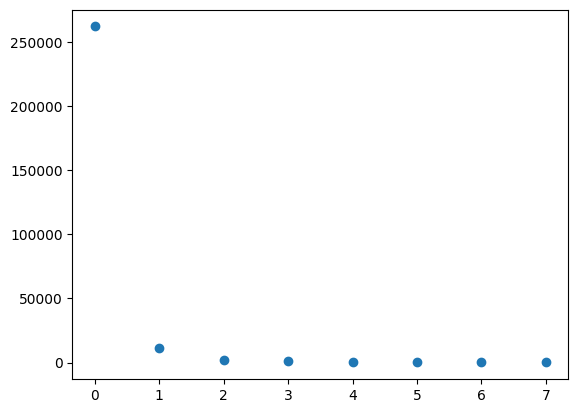

In [8]:
U, S,Vh = np.linalg.svd(Xhouse)
plt.scatter(np.arange(len(S)), S)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

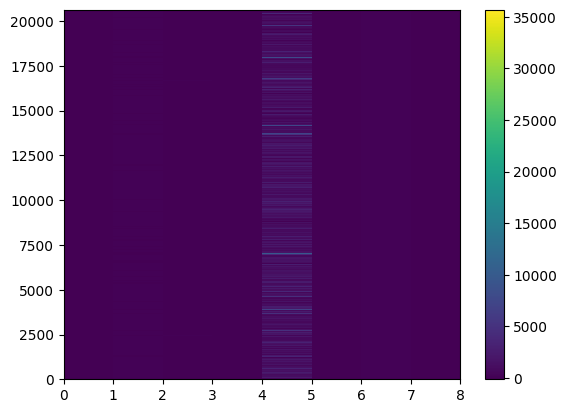

In [9]:
ind_house = np.argsort(Yhouse)
plt.pcolormesh(Xhouse[ind_house]) #para mostrar la gráfica como matriz con colores
plt.colorbar()
plt.show

[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


<StemContainer object of 3 artists>

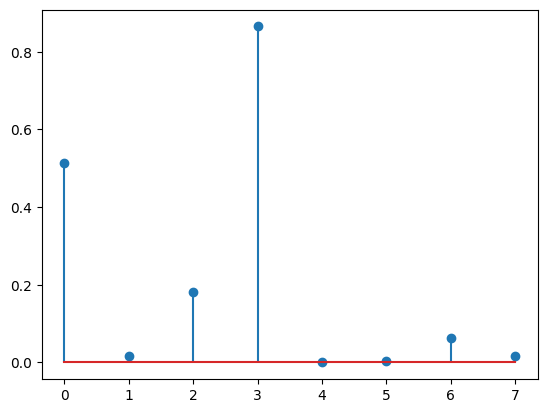

In [10]:
alpha_house = mincua_reg(Xhouse, Yhouse)
print(alpha_house)
plt.stem(np.abs(alpha_house))

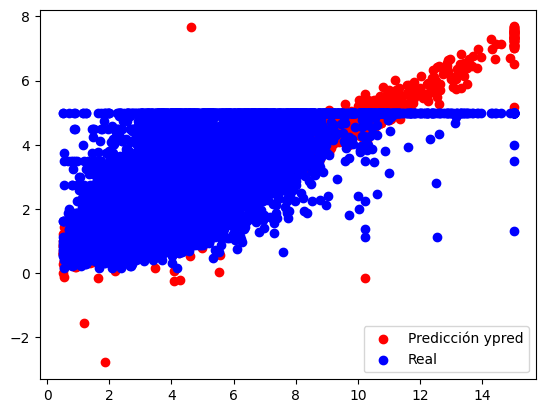

In [11]:
Ypred = Xhouse.dot(alpha_house)
plt.scatter(Xhouse[ind_house,0], Ypred[ind_house], c='r', marker ='o', label='Predicción ypred') #scatter = dispersión
plt.scatter(Xhouse[ind_house,0], Yhouse[ind_house], c='b', label='Real')
plt.legend()
plt.show()

## Solución Iterativa

In [17]:
# ---------- utilidades ----------
def add_bias(X):
    N = X.shape[0]
    return np.hstack([np.ones((N,1)), X])

def mse(X, w, y):
    r = X @ w - y
    return float((r @ r) / X.shape[0])

def mincua_reg(X, y, lamb_=1e-3, penalize_bias=False):
    """
    Ridge: (X^T X + λR)^(-1) X^T y
    - Si penalize_bias=False, no penaliza el término de sesgo (primer coeficiente).
    """
    D = X.shape[1]
    if penalize_bias:
        R = np.eye(D)
    else:
        R = np.diag([0.0] + [1.0]*(D-1))
    return np.linalg.inv(X.T @ X + lamb_ * R) @ (X.T @ y)

# ---------- tu GD tal cual ----------
def gd_linear_regression(X, y, iters=2000, eta=None, c_auto=0.9, tol=1e-9, verbose=True):
    N, D = X.shape
    if eta is None:
        smax = np.linalg.svd(X, compute_uv=False)[0]
        L = 2.0 * (smax**2) / N
        eta = c_auto / (L + 1e-18)

    w = np.zeros(D)
    J_hist, w_hist = [], []
    for t in range(iters):
        r = X @ w - y
        J = (r @ r) / N
        J_hist.append(J)
        w_hist.append(w.copy())

        grad = (2.0 / N) * (X.T @ r)
        w_next = w - eta * grad
        if np.linalg.norm(w_next - w) < tol * (1.0 + np.linalg.norm(w)):
            w = w_next
            J_hist.append(mse(X, w, y))
            w_hist.append(w.copy())
            break
        w = w_next

    if verbose:
        print(f"eta={eta:.3e} | iters={len(J_hist)-1} | J_final={J_hist[-1]:.6f}")
    return w, np.array(J_hist), np.array(w_hist), eta


## Base de datos simulada

eta=3.845e-01 | iters=21 | J_final=0.010183


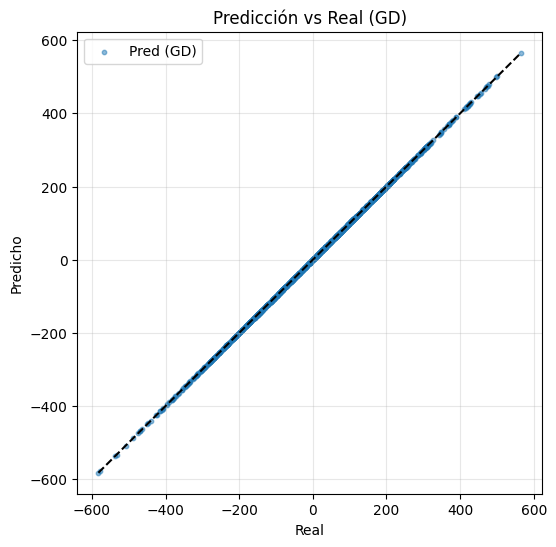

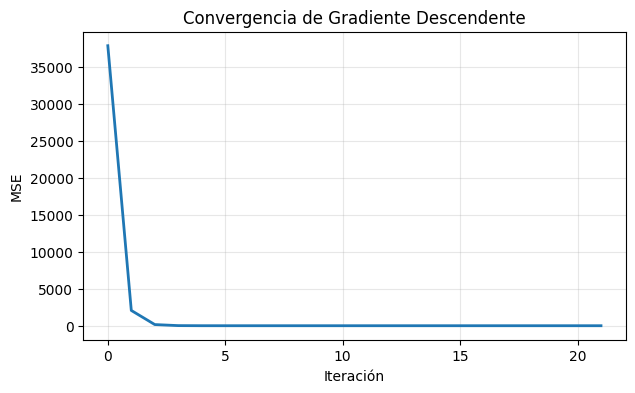

In [19]:
# 2) Preprocesamiento: estandarizar + añadir bias
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
Xb = np.hstack([np.ones((N,1)), X_std])  # columna de 1s para bias

# 3) Usar tu misma función gd_linear_regression
w_gd, J_hist, w_hist, eta = gd_linear_regression(
    Xb, y, iters=3000, eta=None, c_auto=0.95, tol=1e-9, verbose=True
)

# 4) Predicciones
y_pred = Xb @ w_gd


# 5) Graficar pred vs real
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, s=10, alpha=0.5, label="Pred (GD)")
lims = [min(y.min(), y_pred.min()), max(y.max(), y_pred.max())]
plt.plot(lims, lims, 'k--')
plt.xlabel("Real"); plt.ylabel("Predicho")
plt.legend(); plt.grid(True, alpha=0.3)
plt.title("Predicción vs Real (GD)")
plt.show()

# 6) Graficar costo por iteración
plt.figure(figsize=(7,4))
plt.plot(J_hist, linewidth=2)
plt.xlabel("Iteración"); plt.ylabel("MSE")
plt.title("Convergencia de Gradiente Descendente")
plt.grid(True, alpha=0.3)
plt.show()


## Base de datos real

X shape: (20640, 8) | y shape: (20640,)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Analítica (ridge λ=1e-3, sin penalizar bias): J(w*) = 0.524321
eta=2.220e-01 | iters=729 | J_final=0.524321
GD: J(w_gd) = 0.524321
‖w_gd - w*‖ = 8.181002e-07


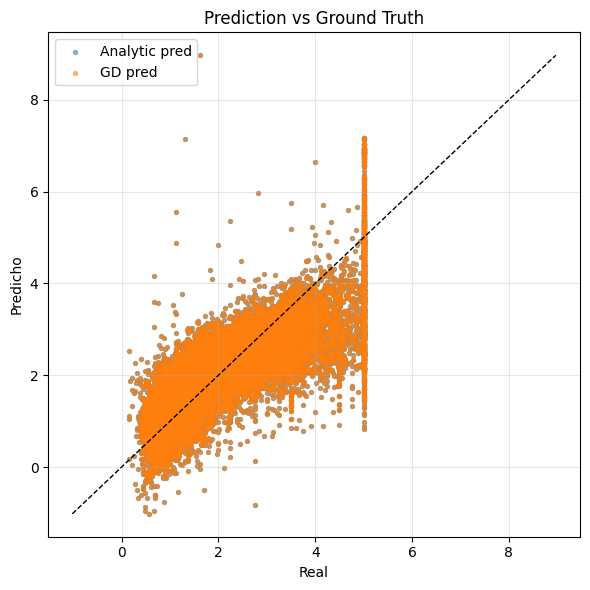

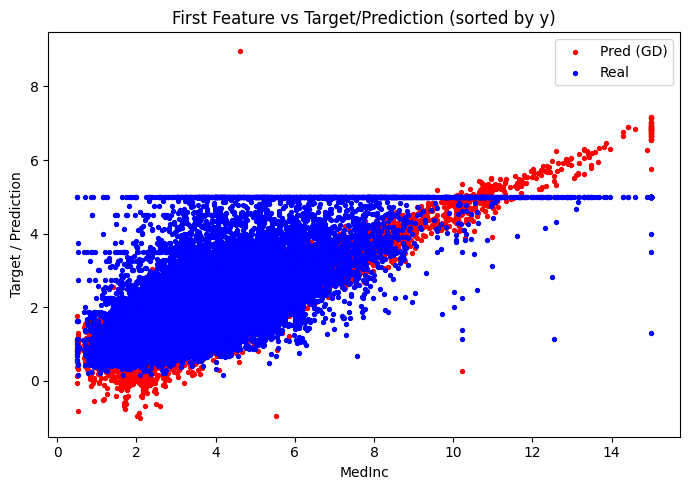

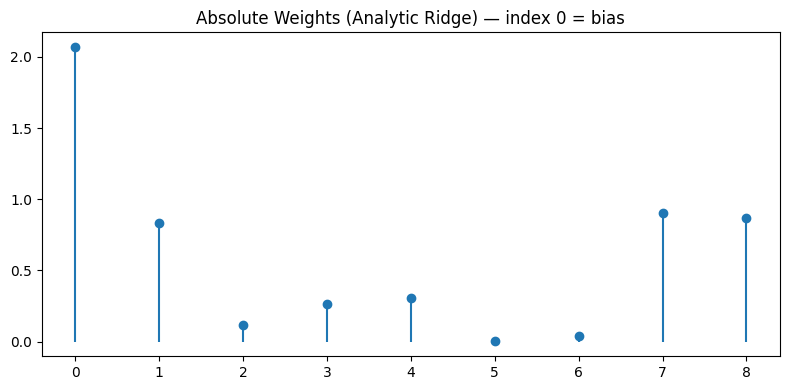

In [18]:
# ---------------------------
# Preprocesamiento
# ---------------------------
names  = housing.feature_names
print("X shape:", Xhouse.shape, "| y shape:", Yhouse.shape)
print("Features:", names)

scaler = StandardScaler()
X_std = scaler.fit_transform(Xhouse)
Xb = add_bias(X_std)  # sesgo en la primera columna

# ---------------------------
# Solución analítica con tu mincua_reg
# ---------------------------
w_star = mincua_reg(Xb, Yhouse, lamb_=1e-3, penalize_bias=False)  # <-- usa tu función
J_star = mse(Xb, w_star, Yhouse)
print(f"Analítica (ridge λ=1e-3, sin penalizar bias): J(w*) = {J_star:.6f}")

# ---------------------------
# Solución iterativa (GD)
# ---------------------------
w_gd, J_hist, w_hist, eta = gd_linear_regression(
    Xb, Yhouse, iters=3000, eta=None, c_auto=0.9, tol=1e-9, verbose=True
)
J_gd = J_hist[-1]
print(f"GD: J(w_gd) = {J_gd:.6f}")
print(f"‖w_gd - w*‖ = {np.linalg.norm(w_gd - w_star):.6e}")

# ---------------------------
# Gráficas
# ---------------------------

# 3) Predicción vs Real
y_pred_star = Xb @ w_star
y_pred_gd   = Xb @ w_gd

plt.figure(figsize=(6,6))
plt.scatter(Yhouse, y_pred_star, s=8, alpha=0.5, label="Analytic pred")
plt.scatter(Yhouse, y_pred_gd,   s=8, alpha=0.5, label="GD pred")
lims = [min(Yhouse.min(), y_pred_star.min(), y_pred_gd.min()),
        max(Yhouse.max(), y_pred_star.max(), y_pred_gd.max())]
plt.plot(lims, lims, 'k--', linewidth=1)
plt.xlabel("Real"); plt.ylabel("Predicho")
plt.title("Prediction vs Ground Truth")
plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

# 4) Scatter con primera feature ordenada por y (como tu ejemplo)
ind_house = np.argsort(Yhouse)
plt.figure(figsize=(7,5))
plt.scatter(Xhouse[ind_house, 0], y_pred_gd[ind_house], c='r', s=8, label='Pred (GD)')
plt.scatter(Xhouse[ind_house, 0], Yhouse[ind_house],   c='b', s=8, label='Real')
plt.xlabel(names[0]); plt.ylabel("Target / Prediction")
plt.legend(); plt.title("First Feature vs Target/Prediction (sorted by y)")
plt.tight_layout(); plt.show()

# 5) Magnitud de pesos analíticos (incluye bias en índice 0)
plt.figure(figsize=(8,4))
plt.stem(np.abs(w_star), basefmt=" ")
plt.title("Absolute Weights (Analytic Ridge) — index 0 = bias")
plt.tight_layout(); plt.show()
